In [1]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(raster)
library(gdalUtils)

Loading required package: sp


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select


The following object is masked from ‘package:tidyr’:

    extract




In [3]:
#rm(list=ls())

In [3]:
# get all the rasters aso tiles
#list files in a specific folder
veg_aso <- list.files(path = "~/dah/")

In [4]:
asos <- list()
preds <-list()
for (vaso in veg_aso)
{
    #print(vaso)
    recur = list.files(path=paste("~/dah/",vaso,sep=""),recursive = TRUE)
    #print(recur)
    for (filename in recur)
        {
          if (startsWith(filename,'mask/') & endsWith(filename,"merged.tif"))
              asos <- append(asos,paste("~/dah/",vaso,"/",filename,sep=""))
              
           if (startsWith(filename,'preds/') & endsWith(filename,"merged.tif"))
              preds <- append(preds,paste("~/dah/",vaso,"/",filename,sep=""))    
        }
}

print(asos) 
print(preds)        
    

[[1]]
[1] "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[2]]
[1] "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[3]]
[1] "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[4]]
[1] "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"

[[5]]
[1] "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:20180528_181110_1025_3B_AnalyticMS_SR_clip/m

In [5]:
str(asos)

List of 11
 $ : chr "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:201805"| __truncated__
 $ : chr "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:201805"| __truncated__
 $ : chr "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:201805"| __truncated__
 $ : chr "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:201805"| __truncated__
 $ : chr "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:201805"| __truncated__
 $ : chr "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:201805"| __truncated__
 $ : chr "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:201805"| __truncated__
 $ : chr "~/dah/planet-

In [6]:
aso_un <- unlist(asos)
pred_un <- unlist(preds)

In [7]:
aso_un_list <- paste(aso_un, collapse=' ' )
pred_un_list <- paste(pred_un, collapse=' ' )

In [8]:
system("mkdir aso_dah")

In [9]:
system("mkdir aso_dah_pred")

In [10]:
file.copy(from=pred_un, to='./aso_dah_pred', 
          overwrite = TRUE, recursive = FALSE, 
          copy.mode = TRUE)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [11]:
for(i in 1:length(aso_un))
    {
     print(aso_un[i])
    file.copy(from=aso_un[i],to=paste('./aso_dah/',i,'-ASO_3M_SD_USCATE_20180528_binary_merged.tif',sep=""))
}

[1] "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:20180528_180846_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:20180528_180847_1002_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:20180528_181109_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif"
[1] "~/dah/planet-snowcover-experiments:planet-snowcover-2020-05-02-21-00-53-062:planet-snowcover-imagery-dah:20180528_181110_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_bina

In [13]:
fo <- list.files(path = "./aso_dah", pattern = ".tif$", full.names = TRUE)
rlo <- lapply(fo, raster)

aso_dem <- do.call(merge, c(rlo, tolerance = 1))

In [12]:
f <- list.files(path = "./aso_dah_pred", pattern = ".tif$", full.names = TRUE)
rl <- lapply(f, raster)

aso_dem_pred <- do.call(merge, c(rl, tolerance = 1))


In [14]:
aso_dem

class       : RasterLayer 
dimensions  : 26547, 32256, 856300032  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8828, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpWtNn4j/raster/r_tmp_2020-05-05_043349_9134_34752.grd 
names       : layer 
values      : 0, 1  (min, max)


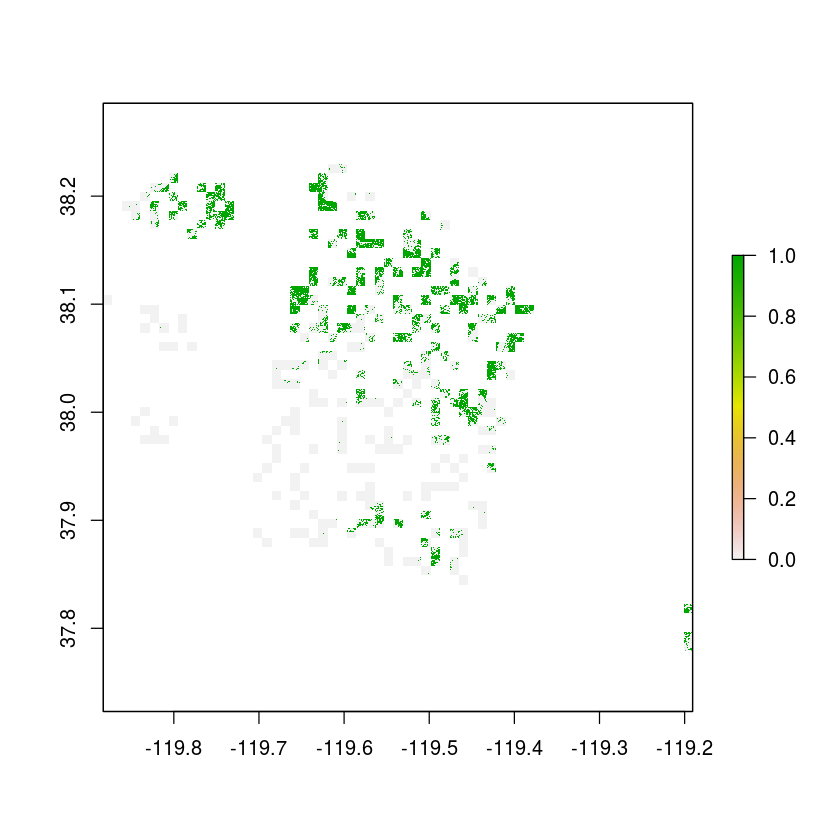

In [15]:
plot(aso_dem)

In [16]:
aso_dem_pred

class       : RasterLayer 
dimensions  : 26557, 32256, 856622592  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695065e-05  (x, y)
extent      : -119.8828, -119.1907, 37.7794, 38.22956  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpWtNn4j/raster/r_tmp_2020-05-05_043125_9134_88626.grd 
names       : layer 
values      : 0, 1  (min, max)


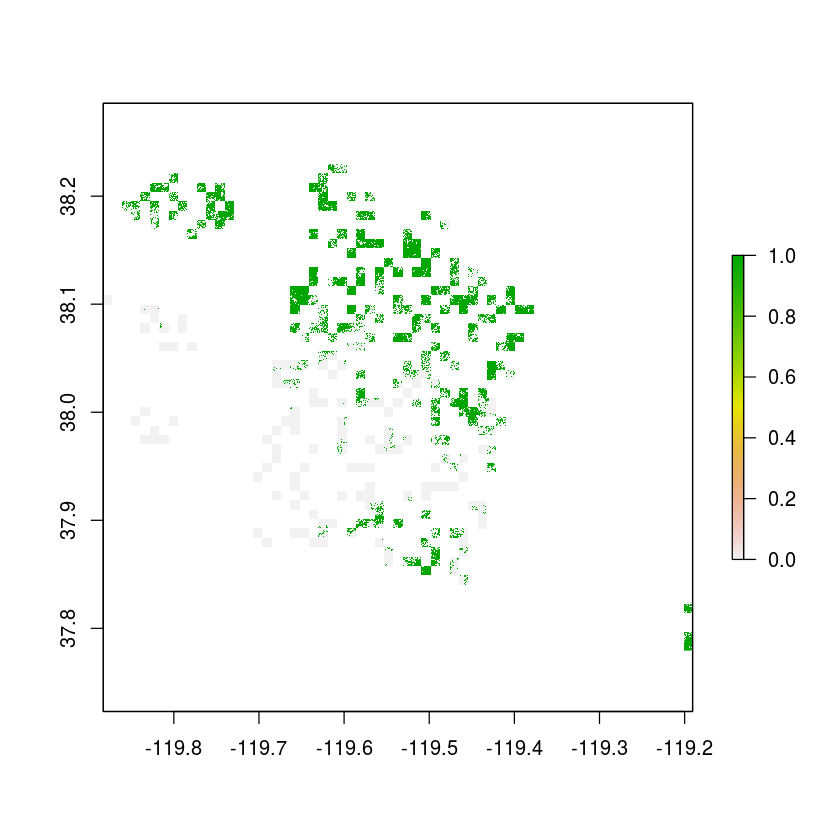

In [17]:
plot(aso_dem_pred)

In [18]:
# save the inter,ediate raster
writeRaster(aso_dem, filename="aso_dah_test_only.tif", format="GTiff", overwrite=TRUE)



In [19]:
writeRaster(aso_dem_pred, filename="aso_dah_pred_test_only.tif", format="GTiff", overwrite=TRUE)

In [3]:
aso_dem <- raster("aso_dah_test_only.tif")

In [4]:
aso_dem_pred <- raster("aso_dah_pred_test_only.tif")

In [5]:
aso_dem

class       : RasterLayer 
dimensions  : 26547, 32256, 856300032  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8828, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/aso_dah_test_only.tif 
names       : aso_dah_test_only 
values      : 0, 1  (min, max)


In [6]:
aso_dem_pred

class       : RasterLayer 
dimensions  : 26557, 32256, 856622592  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695065e-05  (x, y)
extent      : -119.8828, -119.1907, 37.7794, 38.22956  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/aso_dah_pred_test_only.tif 
names       : aso_dah_pred_test_only 
values      : 0, 1  (min, max)


In [26]:
# reproject aso_dem because it doesn't have the same resolution
aso_dem_reproj <- projectRaster(aso_dem, aso_dem_pred)

In [39]:
df <- stack(aso_dem_reproj,aso_dem_pred)

In [28]:
veg_vegResamp <- raster("veg_reasampl2point1by1point6.tif")


In [29]:
veg_crop<-crop(veg_vegResamp,extent(df))

In [30]:
veg_crop

class       : RasterLayer 
dimensions  : 26547, 32256, 856300032  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8828, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpWtNn4j/raster/r_tmp_2020-05-05_165923_9134_33912.grd 
names       : veg_reasampl2point1by1point6 
values      : 0, 54.08412  (min, max)


In [31]:
writeRaster(veg_crop, filename="aso_dah_ch_test_only.tif", format="GTiff", overwrite=TRUE)

In [32]:
veg_crop

class       : RasterLayer 
dimensions  : 26547, 32256, 856300032  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8828, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpWtNn4j/raster/r_tmp_2020-05-05_165923_9134_33912.grd 
names       : veg_reasampl2point1by1point6 
values      : 0, 54.08412  (min, max)


In [40]:
df

class       : RasterStack 
dimensions  : 26557, 32256, 856622592, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2.145767e-05, 1.695065e-05  (x, y)
extent      : -119.8828, -119.1907, 37.7794, 38.22956  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : aso_dah_test_only, aso_dah_pred_test_only 
min values  :     -0.0001762735,           0.0000000000 
max values  :                 1,                      1 


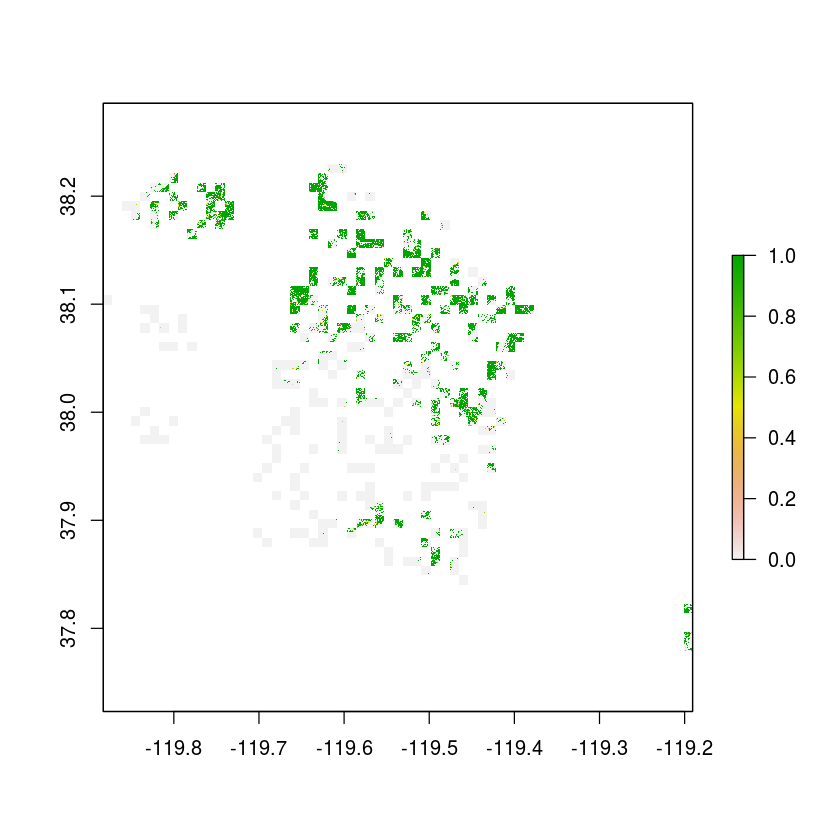

In [38]:
plot(aso_dem_reproj)

In [34]:
#data_matrix <- rasterToPoints(df)
#head(data_matrix)
#datafra_comb <- data_matrix %>% as.data.frame()

In [35]:
veg_crop_aso <- crop(veg_crop, extent(df))

In [ ]:
# mask all the pixels below 2
veg_crop_h <- veg_crop_aso
veg_crop_h[veg_crop_h < 2] <- NA
aso_demabove2 <- mask(aso_dem, veg_crop_h, filename="aso_dahabove2_test.tif",overwrite=TRUE)

In [ ]:
aso_dem_predabove2 <- mask(aso_dem_pred, veg_crop_h,filename="pred_dahabove2_test.tif",overwrite=TRUE)

In [ ]:
aso_dem_predabove2 <- raster("pred_dahabove2_test.tif")

In [ ]:
aso_demabove2 <- raster("aso_dahabove2_test.tif")

In [ ]:
vals_pred <- getValues(aso_dem_predabove2)

In [ ]:
library(caret)

In [ ]:
vals_aso <- getValues(aso_demabove2)

In [ ]:
high_veg_perf<- confusionMatrix(vals_aso, vals_pred,mode = "prec_recall")

In [ ]:
high_veg_perf

In [24]:
#create below two mask all excpet the ones below .2
veg_crop_h <- veg_crop_aso
veg_crop_h[veg_crop_h > .2] <- NA
aso_vegbpoint2 <- mask(aso_dem, veg_crop_h, filename="aso_ndvibelowpoint2_test.tif",overwrite=TRUE)

In [25]:
aso_dem_predvegbpoint2 <- mask(aso_dem_pred, veg_crop_h,filename="pred_ndvibelowpoint2_test.tif",overwrite=TRUE)

In [26]:
vals_pred <- getValues(aso_dem_predvegbpoint2)

In [27]:
vals_aso <- getValues(aso_vegbpoint2)

In [28]:
low_veg_perf<- confusionMatrix(vals_aso, vals_pred,mode = "prec_recall")

In [29]:
low_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction        0        1
         0  9026149 10949027
         1    73676  8734215
                                          
               Accuracy : 0.617           
                 95% CI : (0.6169, 0.6172)
    No Information Rate : 0.6838          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3297          
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.4519          
                 Recall : 0.9919          
                     F1 : 0.6209          
             Prevalence : 0.3162          
         Detection Rate : 0.3136          
   Detection Prevalence : 0.6940          
      Balanced Accuracy : 0.7178          
                                          
       'Positive' Class : 0               
                                          

In [30]:
#create below two and above .2
veg_crop_h <- veg_crop_aso
veg_crop_h[veg_crop_h < .2 &  veg_crop_h > 2] <- NA
aso_vegabovepoint2below2 <- mask(aso_dem, veg_crop_h, filename="aso_ndviabovepoint2andbelow2_test.tif",overwrite=TRUE)

In [31]:
aso_dem_predabovepoint2andbelow2 <- mask(aso_dem_pred, veg_crop_h,filename="pred_ndviabovepoint2andbelow2_test.tif",overwrite=TRUE)

In [32]:
vals_pred <- getValues(aso_dem_predabovepoint2andbelow2)

In [33]:
vals_aso <- getValues(aso_vegabovepoint2below2)

In [34]:
med_veg_perf<- confusionMatrix(vals_aso, vals_pred,mode = "prec_recall")

In [35]:
med_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction        0        1
         0 28179704 22939789
         1   181878 13806255
                                         
               Accuracy : 0.6449         
                 95% CI : (0.6448, 0.645)
    No Information Rate : 0.5644         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.3383         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
              Precision : 0.5513         
                 Recall : 0.9936         
                     F1 : 0.7091         
             Prevalence : 0.4356         
         Detection Rate : 0.4328         
   Detection Prevalence : 0.7852         
      Balanced Accuracy : 0.6847         
                                         
       'Positive' Class : 0              
                                         

In [1]:
med_veg_perf

ERROR: Error in eval(expr, envir, enclos): object 'med_veg_perf' not found


In [2]:
class <- c("< .2m", "> .2 & < 2m"," > 2m")
f_score <- c(0.6209,0.7091,0.7526)

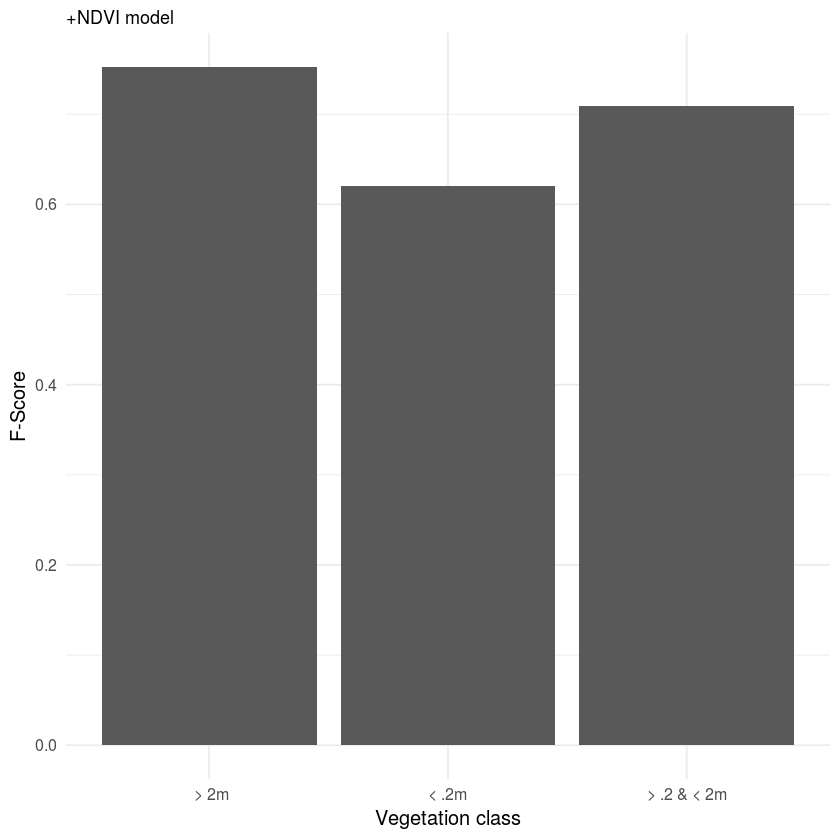

In [5]:
perf<- data.frame(class, f_score)
colnames(perf) <- c('class','f_score')
perf %>% ggplot() + geom_bar(aes(class,f_score),stat="identity") +
 labs(x="Vegetation class" , y="F-Score",subtitle="+NDVI model") + theme_minimal(base_size = 12)
ggsave(filename = "gg-ndvi+allclasses.png",dpi = 300,height=4,width=4,units="in")

In [22]:
# check the result

# mask all the pixels below 1
veg_crop_h <- veg_crop_aso
veg_crop_h[veg_crop_h < 1] <- NA
aso_demabove1 <- mask(aso_dem, veg_crop_h, filename="aso_ndviabove1_test.tif",overwrite=TRUE)

ERROR: Error in eval(expr, envir, enclos): object 'veg_crop_aso' not found


In [15]:
aso_dem_pred


class       : RasterLayer 
dimensions  : 26544, 31232, 829022208  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695862e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/aso_ndvi_pred_test_only.tif 
names       : aso_ndvi_pred_test_only 
values      : 0, 1  (min, max)


In [16]:
veg_crop_h

class       : RasterLayer 
dimensions  : 26547, 31232, 829115904  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpQ4jTi5/raster/r_tmp_2020-05-02_055321_2738_67490.grd 
names       : layer 
values      : 1, 54.08412  (min, max)


In [19]:
aso_dem_pred_prj <- projectRaster(aso_dem_pred,veg_crop_h)

In [20]:
aso_dem_pred_prj

class       : RasterLayer 
dimensions  : 26547, 31232, 829115904  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpQ4jTi5/raster/r_tmp_2020-05-02_061011_2738_85770.grd 
names       : aso_ndvi_pred_test_only 
values      : -5.875066e-05, 1  (min, max)


In [21]:
aso_dem_predabove1 <- mask(aso_dem_pred_prj, 
                           veg_crop_h,filename="pred_ndviabove1_test.tif",overwrite=TRUE)

In [22]:
aso_dem_predabove1

class       : RasterLayer 
dimensions  : 26547, 31232, 829115904  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/pred_ndviabove1_test.tif 
names       : pred_ndviabove1_test 
values      : 0, 1  (min, max)


In [23]:
veg_crop_h

class       : RasterLayer 
dimensions  : 26547, 31232, 829115904  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /tmp/RtmpQ4jTi5/raster/r_tmp_2020-05-02_055321_2738_67490.grd 
names       : layer 
values      : 1, 54.08412  (min, max)


In [24]:
writeRaster(veg_crop_h, filename="veg_above_1.tif", format="GTiff", overwrite=TRUE)

In [23]:
aso_dem <- raster("aso_ndvi_test_only.tif")

In [25]:
aso_dem

class       : RasterLayer 
dimensions  : 26544, 31232, 829022208  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695862e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/aso_ndvi_test_only.tif 
names       : aso_ndvi_test_only 
values      : 0, 1  (min, max)


In [26]:
veg_crop_h

class       : RasterLayer 
dimensions  : 26547, 31232, 829115904  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8608, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/veg_above_1.tif 
names       : veg_above_1 
values      : 1, 54.08412  (min, max)


In [27]:
aso_dem_prj <- projectRaster(aso_dem,veg_crop_h)

In [28]:
# mask all the pixels below 1

aso_demabove1 <- mask(aso_dem_prj, veg_crop_h, filename="aso_ndviabove1_test.tif",overwrite=TRUE)

In [29]:
aso_dem_above1<- raster('aso_ndviabove1_test.tif')

In [7]:
aso_dem_predabove1<- raster('pred_ndviabove1_test.tif')

In [8]:
veg_crop_h <- raster('veg_above_1.tif')

In [30]:
onem_df <- stack(aso_dem_predabove1,aso_dem_predabove1,veg_crop_h)

In [31]:
data_matrix <- rasterToPoints(onem_df)
head(data_matrix)
datafra_comb <- data_matrix %>% as.data.frame()

x,y,pred_ndviabove1_test.1,pred_ndviabove1_test.2,veg_above_1
-119.4995,38.18838,NA,NA,1.981519
-119.4995,38.18838,NA,NA,1.463764
-119.4991,38.18838,NA,NA,1.088179
-119.4991,38.18838,NA,NA,1.055851
-119.4989,38.18838,NA,NA,1.037520
-119.4989,38.18838,NA,NA,1.102266


In [32]:
head(datafra_comb)

x,y,pred_ndviabove1_test.1,pred_ndviabove1_test.2,veg_above_1
-119.4995,38.18838,NA,NA,1.981519
-119.4995,38.18838,NA,NA,1.463764
-119.4991,38.18838,NA,NA,1.088179
-119.4991,38.18838,NA,NA,1.055851
-119.4989,38.18838,NA,NA,1.037520
-119.4989,38.18838,NA,NA,1.102266


In [36]:
colnames(datafra_comb) <- c('x','y','ndvi_pred','ndvi_aso','veg_height')

In [37]:
nrow(datafra_comb)

[1] 184171620

In [38]:
datafra_comb%>% filter(!is.na(ndvi_pred)) %>% nrow()

[1] 26971251

In [39]:
data_not_na <- datafra_comb%>% filter(!is.na(ndvi_pred)) %>% as.data.frame()

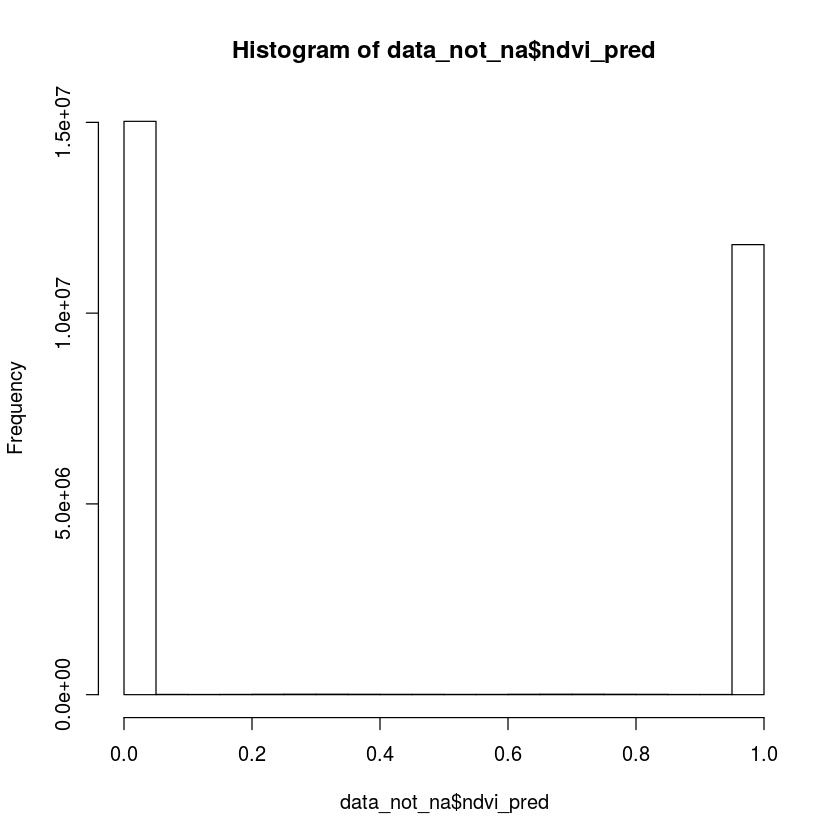

In [40]:
hist(data_not_na$ndvi_pred)

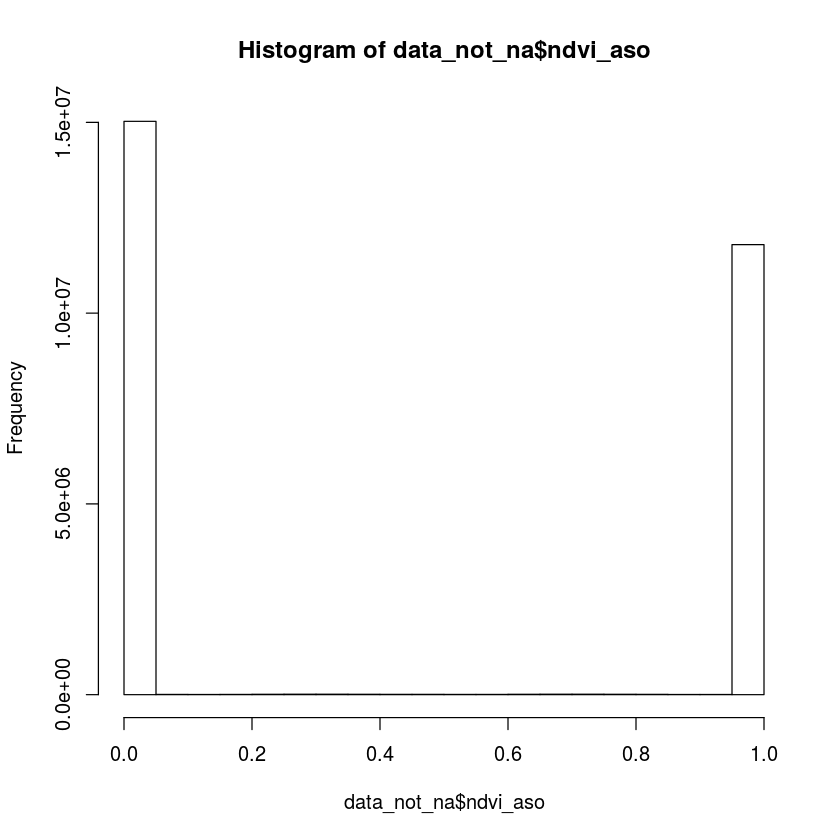

In [42]:
hist(data_not_na$ndvi_aso)

In [ ]:
plot(data_not_na$ndvi_aso,data_not_na$ndvi_pred)

In [ ]:
hist(data_not_na$veg_height)

ERROR: Error in head(new_ndvi_by): object 'new_ndvi_by' not found
